AND Gate:
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1

OR Gate:
Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 1


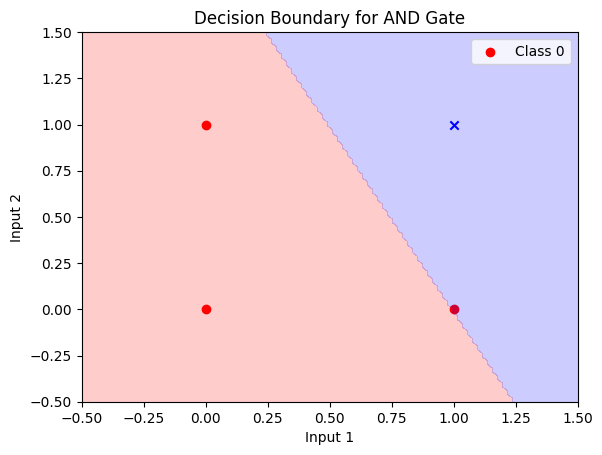

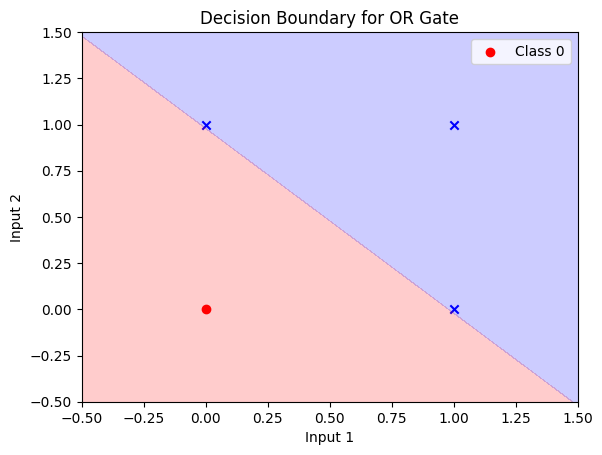

In [1]:
# implementation of perceptron for logical gate - AND & OR
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.zeros(input_size + 1)  # +1 for the bias term
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        # Add bias input (always 1)
        x_with_bias = np.insert(x, 0, 1)
        return self.activation_function(np.dot(self.weights, x_with_bias))

    def train(self, X, y):
        for epoch in range(self.epochs):
            for i in range(len(X)):
                x_with_bias = np.insert(X[i], 0, 1)  # Add bias input
                y_pred = self.activation_function(np.dot(self.weights, x_with_bias))
                error = y[i] - y_pred
                self.weights += self.learning_rate * error * x_with_bias

    def plot_decision_boundary(self, X, y, title):
        # Plot data points
        for i in range(len(y)):
            if y[i] == 0:
                plt.scatter(X[i][0], X[i][1], color='red', marker='o', label='Class 0' if i == 0 else "")
            else:
                plt.scatter(X[i][0], X[i][1], color='blue', marker='x', label='Class 1' if i == 0 else "")

        # Plot decision boundary
        x_min, x_max = -0.5, 1.5
        y_min, y_max = -0.5, 1.5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        grid = np.c_[xx.ravel(), yy.ravel()]
        predictions = np.array([self.predict(point) for point in grid])
        zz = predictions.reshape(xx.shape)
        plt.contourf(xx, yy, zz, levels=[-1, 0, 1], alpha=0.2, colors=('red', 'blue'))

        plt.title(title)
        plt.xlabel('Input 1')
        plt.ylabel('Input 2')
        plt.legend()
        plt.show()

# Training data for AND gate
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Training data for OR gate
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

# Create perceptrons for AND and OR gates
and_perceptron = Perceptron(input_size=2)
or_perceptron = Perceptron(input_size=2)

# Train perceptrons
and_perceptron.train(X_and, y_and)
or_perceptron.train(X_or, y_or)

# Test the perceptrons
print("AND Gate:")
for x in X_and:
    print(f"Input: {x}, Output: {and_perceptron.predict(x)}")

print("\nOR Gate:")
for x in X_or:
    print(f"Input: {x}, Output: {or_perceptron.predict(x)}")

# Plot decision boundaries
and_perceptron.plot_decision_boundary(X_and, y_and, "Decision Boundary for AND Gate")
or_perceptron.plot_decision_boundary(X_or, y_or, "Decision Boundary for OR Gate")


Training Features (X_train):
 [[-0.52639686 -1.15139792 -3.75268255 -1.32277365 -0.70120553 -4.13525578
  -0.49073479 -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485  0.23350519 -0.70120553 -0.48916881
   2.41502991  1.48710085]
 [-0.82846011  0.56687102 -1.2658623  -0.09071957  0.01344832 -0.42452187
   0.54916055 -0.94893896]
 [-1.13052335  1.2541786  -1.04961706 -1.32277365 -0.70120553 -1.30372015
  -0.63929127  2.79212217]
 [ 0.68185612  0.41066475  0.57222224  1.07648956  2.48460077  1.83812075
  -0.68682934  1.13909516]]
Training Labels (y_train):
 [0 1 0 0 1]

Testing Features (X_test):
 [[ 0.68185612 -0.71402038 -0.61712658  0.81710976  0.93474906  0.26073561
  -0.11637247  0.87809089]
 [-0.52639686 -0.27664283  0.30191569  0.7522648  -0.70120553  0.48053518
  -0.954231   -1.03594038]
 [-0.52639686 -0.40160784 -0.29275872 -1.32277365 -0.70120553 -0.15300476
  -0.9245197  -1.03594038]
 [ 1.28598261 -0.43284909  0.57222224 -1.32277365 -0.70120553 -0.95462672
   1.14932872  0.0

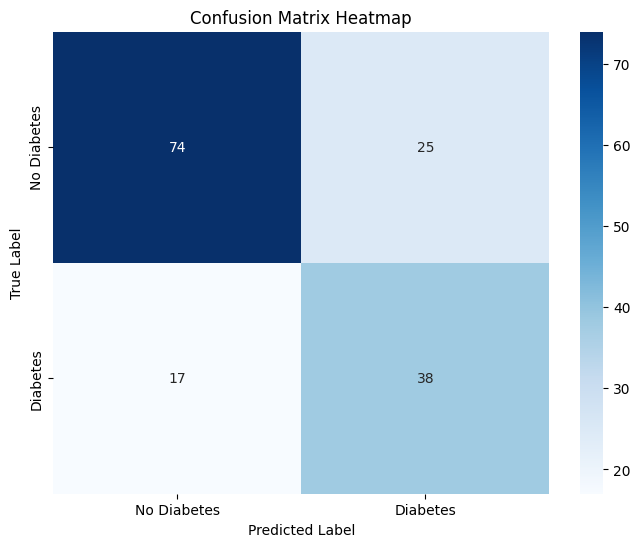

In [8]:
# implementation of perceptron for binary classification of diabetes dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Pima Indians Diabetes dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, names=columns)

# Split into features and target variable
X = data.iloc[:, :-1].values  # Features
y = data.iloc[:, -1].values   # Target variable (Outcome)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for Perceptron)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display the input and output values for both training and testing sets
print("Training Features (X_train):\n", X_train[:5])  # Show first 5 rows of features for training
print("Training Labels (y_train):\n", y_train[:5])    # Show first 5 labels for training
print("\nTesting Features (X_test):\n", X_test[:5])    # Show first 5 rows of features for testing
print("Testing Labels (y_test):\n", y_test[:5])        # Show first 5 labels for testing

# Initialize and train the perceptron model
model = Perceptron(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Diabetes", "Diabetes"], yticklabels=["No Diabetes", "Diabetes"])
plt.title("Confusion Matrix Heatmap")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


AND Gate:
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1

OR Gate:
Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 1


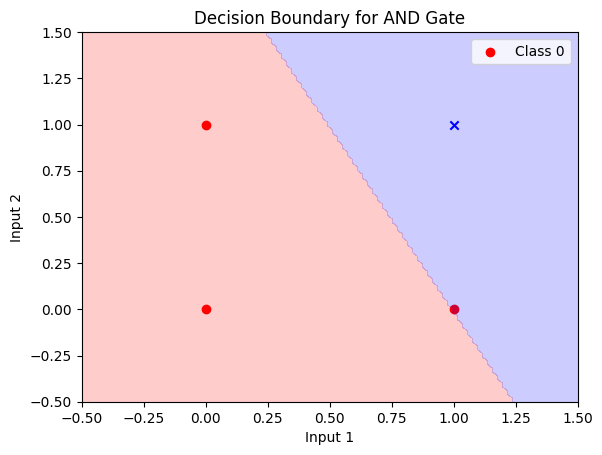

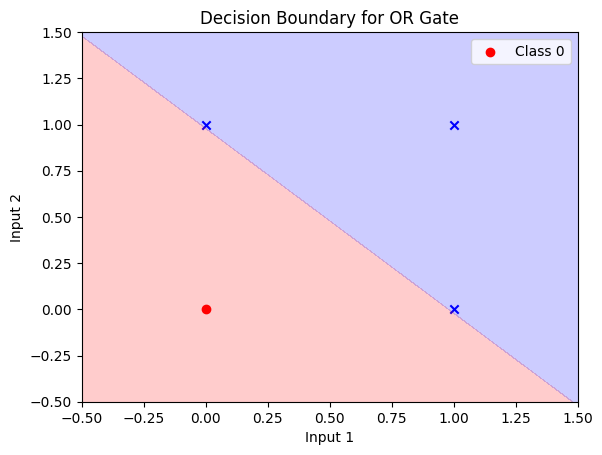

In [4]:
# implementation of single layer perceptron for logical gates AND & OR
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100):
        self.weights = np.zeros(input_size + 1)  # +1 for the bias term
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        # Add bias input (always 1)
        x_with_bias = np.insert(x, 0, 1)
        return self.activation_function(np.dot(self.weights, x_with_bias))

    def train(self, X, y):
        for epoch in range(self.epochs):
            for i in range(len(X)):
                x_with_bias = np.insert(X[i], 0, 1)  # Add bias input
                y_pred = self.activation_function(np.dot(self.weights, x_with_bias))
                error = y[i] - y_pred
                self.weights += self.learning_rate * error * x_with_bias

    def plot_decision_boundary(self, X, y, title):
        # Plot data points
        for i in range(len(y)):
            if y[i] == 0:
                plt.scatter(X[i][0], X[i][1], color='red', marker='o', label='Class 0' if i == 0 else "")
            else:
                plt.scatter(X[i][0], X[i][1], color='blue', marker='x', label='Class 1' if i == 0 else "")

        # Plot decision boundary
        x_min, x_max = -0.5, 1.5
        y_min, y_max = -0.5, 1.5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        grid = np.c_[xx.ravel(), yy.ravel()]
        predictions = np.array([self.predict(point) for point in grid])
        zz = predictions.reshape(xx.shape)
        plt.contourf(xx, yy, zz, levels=[-1, 0, 1], alpha=0.2, colors=('red', 'blue'))

        plt.title(title)
        plt.xlabel('Input 1')
        plt.ylabel('Input 2')
        plt.legend()
        plt.show()

# Training data for AND gate
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Training data for OR gate
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

# Create perceptrons for AND and OR gates
and_perceptron = Perceptron(input_size=2)
or_perceptron = Perceptron(input_size=2)

# Train perceptrons
and_perceptron.train(X_and, y_and)
or_perceptron.train(X_or, y_or)

# Test the perceptrons
print("AND Gate:")
for x in X_and:
    print(f"Input: {x}, Output: {and_perceptron.predict(x)}")

print("\nOR Gate:")
for x in X_or:
    print(f"Input: {x}, Output: {or_perceptron.predict(x)}")

# Plot decision boundaries
and_perceptron.plot_decision_boundary(X_and, y_and, "Decision Boundary for AND Gate")
or_perceptron.plot_decision_boundary(X_or, y_or, "Decision Boundary for OR Gate")


Test Results:
Input: [0.78980621 0.68550197], Predicted: 2, Actual: 0
Input: [1.49390724 1.52930533], Predicted: 2, Actual: 0
Input: [-0.08723191  0.42517966], Predicted: 1, Actual: 2
Input: [ 0.90098006 -0.75075906], Predicted: 0, Actual: 0
Input: [-0.77898029 -1.0469879 ], Predicted: 1, Actual: 1
Input: [ 1.60508109 -0.37374054], Predicted: 0, Actual: 0
Input: [-1.23602833  0.98173081], Predicted: 1, Actual: 1
Input: [0.49334262 1.41260912], Predicted: 2, Actual: 2
Input: [-1.71778167 -0.88540853], Predicted: 1, Actual: 1
Input: [0.44393202 0.20076388], Predicted: 2, Actual: 2
Input: [ 0.61686912 -0.47248348], Predicted: 0, Actual: 0
Input: [0.61686912 0.70345524], Predicted: 2, Actual: 2
Input: [0.50569527 1.3497727 ], Predicted: 2, Actual: 0
Input: [-0.28487431  0.98173081], Predicted: 1, Actual: 1
Input: [ 0.77745356 -0.47248348], Predicted: 0, Actual: 0
Input: [-0.59369055  0.08406767], Predicted: 1, Actual: 1
Input: [-1.96483466 -1.43298305], Predicted: 1, Actual: 1
Input: [-1.1

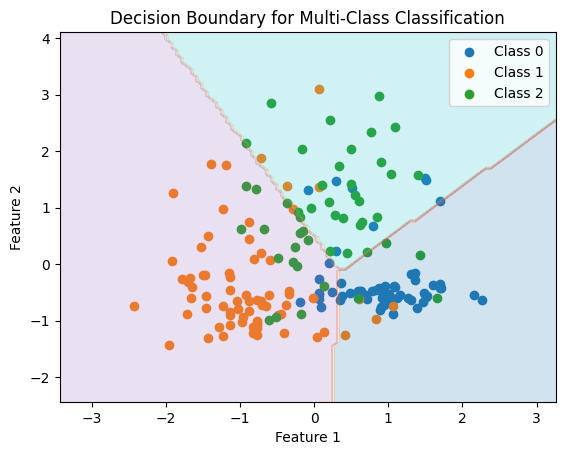

In [6]:
# implementation of single layer perceptron for multiclass classification using wine dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

class PerceptronMultiClass:
    def __init__(self, input_size, num_classes, learning_rate=0.1, epochs=100):
        self.weights = np.zeros((num_classes, input_size + 1))  # +1 for the bias term
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.num_classes = num_classes

    def activation_function(self, x):
        return np.argmax(x)  # Return the index of the maximum value

    def predict(self, x):
        # Add bias input (always 1)
        x_with_bias = np.insert(x, 0, 1)
        output = np.dot(self.weights, x_with_bias)
        return self.activation_function(output)

    def train(self, X, y):
        for epoch in range(self.epochs):
            for i in range(len(X)):
                x_with_bias = np.insert(X[i], 0, 1)  # Add bias input
                output = np.dot(self.weights, x_with_bias)
                y_pred = self.activation_function(output)
                if y_pred != y[i]:
                    self.weights[y[i]] += self.learning_rate * x_with_bias
                    self.weights[y_pred] -= self.learning_rate * x_with_bias

    def plot_decision_boundary(self, X, y, title):
        # Plot data points
        for i in range(self.num_classes):
            plt.scatter(X[y == i, 0], X[y == i, 1], label=f"Class {i}")

        # Plot decision boundaries
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        grid = np.c_[xx.ravel(), yy.ravel()]
        predictions = np.array([self.predict(point) for point in grid])
        zz = predictions.reshape(xx.shape)
        plt.contourf(xx, yy, zz, alpha=0.2, cmap="tab10")

        plt.title(title)
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.legend()
        plt.show()

# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Use only the first two features for visualization purposes
X = X[:, :2]

# Standardize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create perceptron for multi-class classification
multi_class_perceptron = PerceptronMultiClass(input_size=2, num_classes=3)

# Train perceptron
multi_class_perceptron.train(X_train, y_train)

# Test the perceptron
print("Test Results:")
for x, label in zip(X_test, y_test):
    print(f"Input: {x}, Predicted: {multi_class_perceptron.predict(x)}, Actual: {label}")

# Plot decision boundary
multi_class_perceptron.plot_decision_boundary(X, y, "Decision Boundary for Multi-Class Classification")
